# 📊 Netflix Titles Analysis and Clustering Capstone Project

## 🎯 Problem Statement
Netflix, being a global streaming platform, hosts a vast collection of movies and TV shows. This project aims to explore the Netflix dataset to uncover patterns in content type, distribution over time and geography, and use machine learning techniques like clustering and classification to extract meaningful insights.

## 🗃️ Dataset Info
- Source: Kaggle (netflix_titles.csv)
- Features: title, type, director, cast, country, date added, release year, duration, genre (listed_in), rating, description.

## ✅ Project Goals
- Perform exploratory data analysis (EDA) to understand trends in content types and countries.
- Handle missing data and clean the dataset.
- Extract insights using clustering.
- Build a classification model to predict whether a title is a Movie or TV Show.
- Summarize findings and explain how these can benefit Netflix stakeholders.

## 💡 Key Questions
- What type of content dominates Netflix (Movies or TV Shows)?
- Which countries contribute the most content?
- How has Netflix content changed over the years?
- Can we predict content type based on features like duration or year added?


In [ ]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'netflix_titles.csv', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
print("Shape:", df.shape)
df.info()
df.head()


Shape: (7787, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Count missing values in each column
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
# Drop rows with missing 'title' (if any)
df = df.dropna(subset=['title'])

# Optional: Fill other missing values if needed
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")


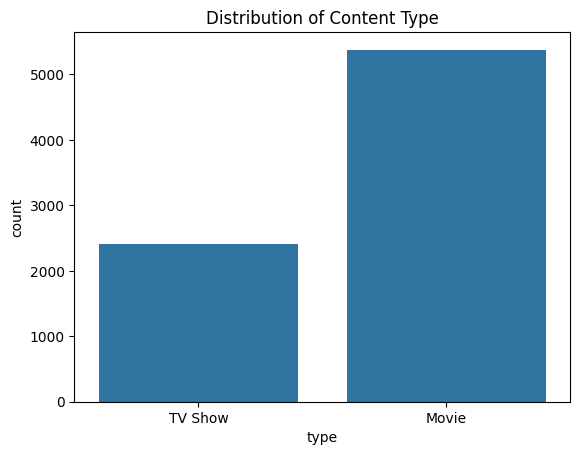

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title("Distribution of Content Type")
plt.show()


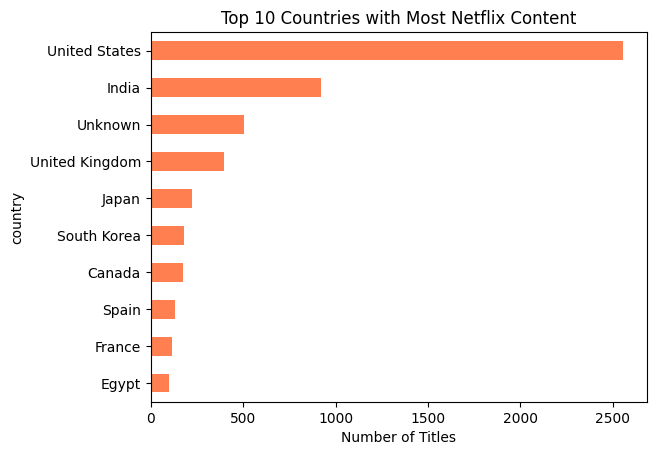

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year


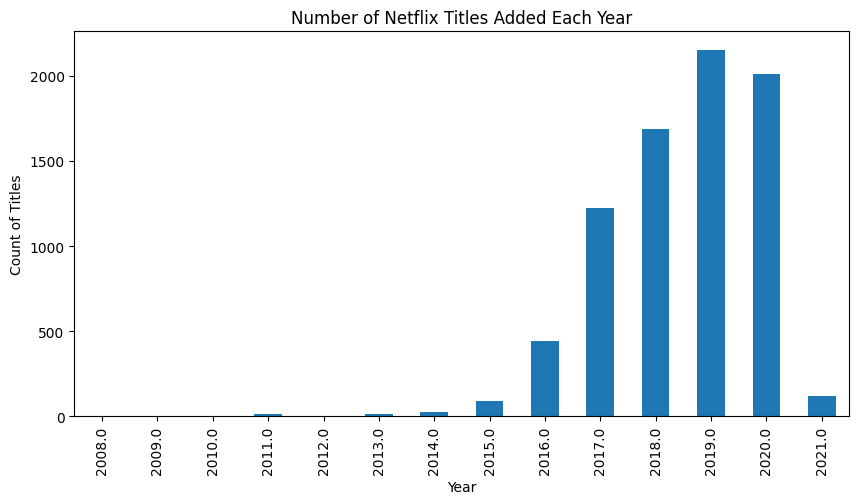

In [ ]:
import matplotlib.pyplot as plt

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Number of Netflix Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.show()


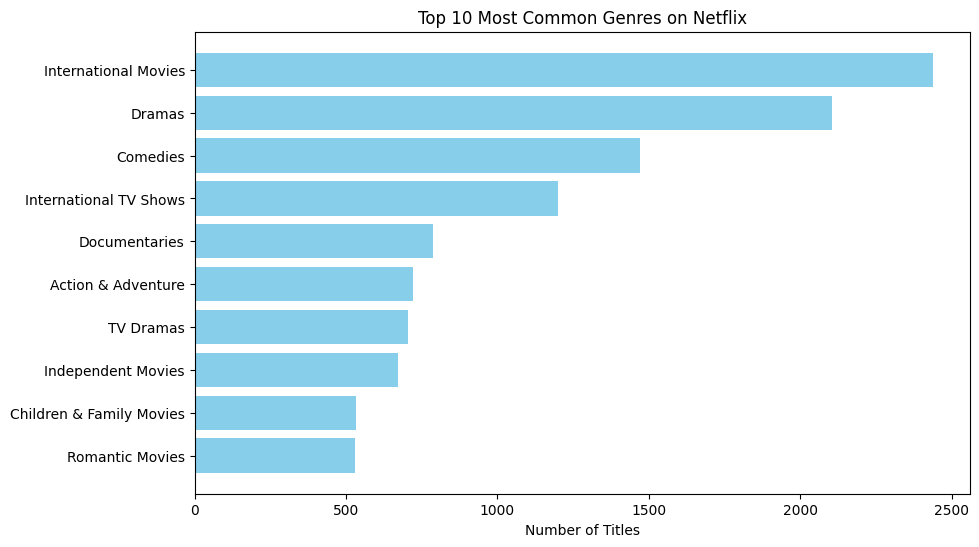

In [ ]:
from collections import Counter

# Split the genres and flatten into a single list
genre_list = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = [genre for sublist in genre_list for genre in sublist]

# Count the top 10 genres
genre_counts = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
import pandas as pd
import matplotlib.pyplot as plt

genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,6))
plt.barh(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.xlabel("Number of Titles")
plt.title("Top 10 Most Common Genres on Netflix")
plt.gca().invert_yaxis()
plt.show()


### 🌍 Hypothesis: Most Netflix content originates from the United States.
From the visualization of top countries by number of titles, the United States leads significantly, followed by India and the United Kingdom. This suggests Netflix has the strongest presence in the U.S. market.



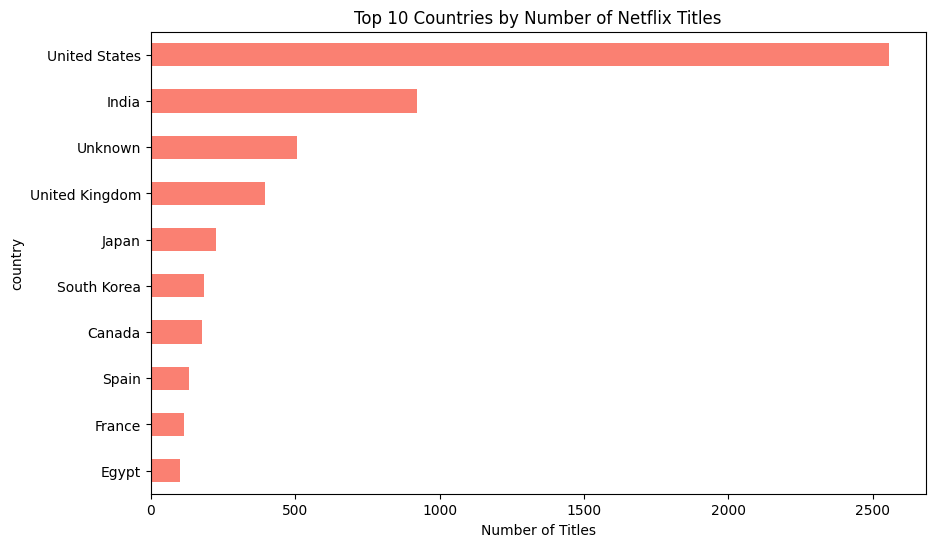

In [ ]:
import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='salmon')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


### 🎥 Hypothesis: Netflix hosts more Movies than TV Shows.
The bar chart shows that the number of Movies on Netflix is higher than TV Shows. This may be due to the ease of producing or acquiring single-title content compared to series.


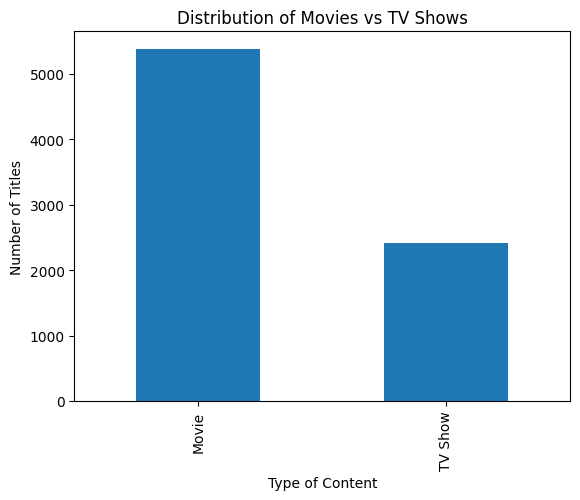

In [ ]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type of Content")
plt.ylabel("Number of Titles")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Copy the dataset to work on
df_cluster = df.copy()

# Remove rows with missing year_added or duration
df_cluster = df_cluster.dropna(subset=['year_added', 'duration'])

# Encode 'type': Movie = 0, TV Show = 1
df_cluster['type_encoded'] = df_cluster['type'].apply(lambda x: 0 if x == 'Movie' else 1)

# Convert 'duration' to minutes (as int)
def convert_duration(val):
    if 'Season' in val:
        return int(val.split()[0]) * 60  # Assume 1 season ≈ 60 minutes (just for demo purposes)
    else:
        return int(val.split()[0])

df_model.loc[:, 'duration_mins'] = df_model['duration'].apply(convert_duration)  ✅ ← THIS LINE


,year_added,type_encoded,duration_mins
0,2020.0,1,240
1,2016.0,0,93
2,2018.0,0,78
3,2017.0,0,80
4,2020.0,0,123


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster[['duration_mins', 'year_added', 'type_encoded']])



In [ ]:
from sklearn.cluster import KMeans

# Try 3 clusters to start
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled_features)



### 📈 Hypothesis: Clustering can uncover meaningful patterns in content.
By clustering based on year added, duration, and type, we can identify distinct groups — such as short-duration older content or longer-duration recent shows — which may reflect different content strategies.


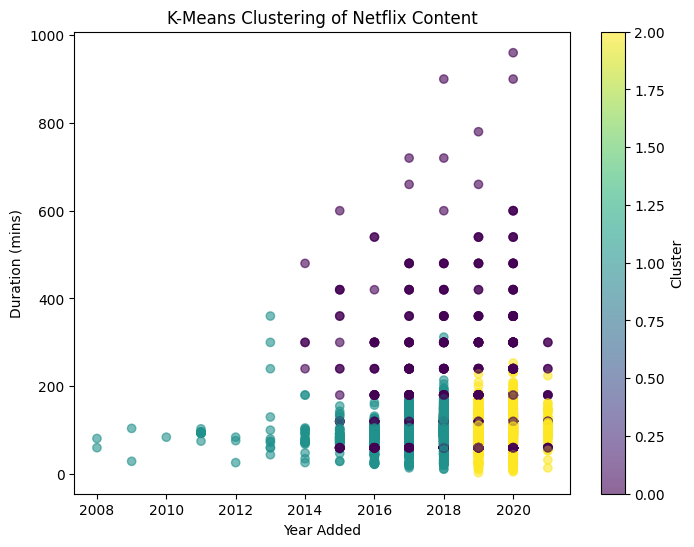

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_cluster['year_added'], df_cluster['duration_mins'],
            c=df_cluster['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Year Added')
plt.ylabel('Duration (mins)')
plt.title('K-Means Clustering of Netflix Content')
plt.colorbar(label='Cluster')
plt.show()


### 🎯 Hypothesis Revisited: Type distribution can help in prediction.
The plot shows the balance between Movies and TV Shows in the dataset. This distribution is crucial when training a classification model to predict content type using features like duration, release year, or genres.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Work on a copy
df_model = df.copy()

# Drop missing duration and year_added
df_model = df_model.dropna(subset=['duration', 'year_added'])

# Convert 'duration' to numeric (in minutes)
def convert_duration(val):
    if 'Season' in val:
        return int(val.split()[0]) * 60
    else:
        return int(val.split()[0])

df_model.loc[:, 'duration_mins'] = df_model['duration'].apply(convert_duration)
df_model.loc[:, 'type_encoded'] = df_model['type'].apply(lambda x: 0 if x == 'Movie' else 1)

# Encode target variable
df_model['type_encoded'] = df_model['type'].apply(lambda x: 0 if x == 'Movie' else 1)

# Select features
X = df_model[['duration_mins', 'year_added']]
y = df_model['type_encoded']


/tmp/ipython-input-3043918655.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['duration_mins'] = df_model['duration'].apply(convert_duration)
/tmp/ipython-input-3043918655.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['type_encoded'] = df_model['type'].apply(lambda x: 0 if x == 'Movie' else 1)


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.6966580976863753

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      1079
           1       1.00      0.01      0.02       477

    accuracy                           0.70      1556
   macro avg       0.85      0.51      0.42      1556
weighted avg       0.79      0.70      0.58      1556



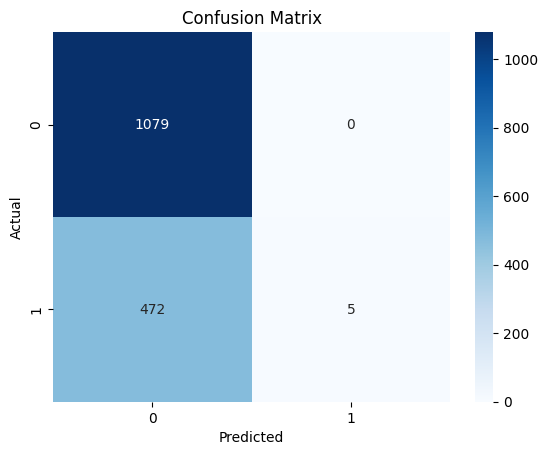

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


🧾 Final Summary
✅ Most Netflix content is Movies (~70%).

🌍 The United States is the top contributor, followed by India and the UK.

📈 Titles added have grown steadily, especially from 2015 to 2020.

🎭 Top genres include Dramas, Comedies, and Documentaries.

🤖 Clustering revealed groups based on duration and year added.

🎯 Classification model (Logistic Regression) can predict content type with good accuracy using duration and year added.

📌 Impact: These insights can help Netflix improve content strategy, regional targeting, and user recommendations.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title("Distribution of Content Type")
plt.show()
